In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import optuna
# import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
#plt.style.use('fivethirtyeight')
import xgboost as xgb
import sklearn
import random
from NecessaryModules.getData import getData

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
filename = '../shot_listed_dataset/CoverTypeNewNormalized.csv'
dataset=getData(filename).values.tolist()
random.shuffle(dataset)
dataset=pd.DataFrame(dataset) #from dataset_list to dataset_dataframe after suffling
# print(dataset)

   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.850622  0.105556  0.150943                          0.045351   
1   0.879149  0.163889  0.188679                          0.426304   
2   0.767116  0.327778  0.320755                          0.068027   
3   0.791494  0.338889  0.226415                          0.294785   
4   0.867220  0.575000  0.584906                          0.385488   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.003509                         0.631060   
1                        0.189474                         0.177358   
2                        0.038596                         0.259652   
3                       -0.077193                         0.085486   
4                        0.314035                         0.074020   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.866142        0.874016          0.548   
1       0.897638        0.866142          0.500   
2    

In [3]:
def split_data(data):
    # splitting the data
    
    msk = np.random.rand(len(data)) < 0.8
    yy = [54] #test title is 54 after suffleing the dataframe 
    train = data[msk]
    test = data[~msk]
    x_train = train[train.columns[:train.shape[1] - 1]]  # all columns except the last are x variables
    y_train = train[yy[0]].tolist()  # the last column as y variable
    x_test = test[test.columns[:test.shape[1] - 1]]
    y_test = test[yy[0]].tolist()  # the last column as y variable
    y_train = [0 if i == 7 else i for i in y_train]  # replace label 7 with 0
    y_test = [0 if i == 7 else i for i in y_test]  # replace label 7 with 0
    return x_train, y_train, x_test, y_test

# PCA Implementation

In [4]:
X=dataset.iloc[:,0:-1]
y=dataset.iloc[:,-1]

In [5]:
pcaTrain = PCA(n_components=40).fit(X)# --train-- pca with the "dataset" Dataframe
print(pcaTrain)
compressed_dataset_X= pcaTrain.transform(X) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X))
print(len(compressed_dataset_X))
print(compressed_dataset_X)

PCA(n_components=40)
<class 'numpy.ndarray'>
19229
[[-6.56783166e-01 -2.75389531e-01 -3.25219451e-01 ... -2.10506761e-02
   2.05366443e-02 -2.78665895e-03]
 [ 8.67917590e-01 -3.51673303e-01 -2.91030609e-01 ...  6.90608901e-02
  -8.40969181e-02  2.11374837e-05]
 [ 9.56169180e-01 -4.32734074e-01  1.58332063e-01 ...  3.08805341e-03
  -7.84898349e-03 -7.97890889e-03]
 ...
 [ 7.21927228e-01 -2.52348322e-01 -4.67588029e-01 ... -2.89469661e-03
  -8.16473610e-04  4.41377648e-03]
 [-4.18551064e-01 -5.87728721e-01  8.54678385e-01 ... -2.63972870e-02
   2.36333911e-02  1.70575028e-03]
 [-6.54175749e-01 -4.50399043e-01  3.01333731e-01 ... -3.17555676e-02
   6.55089250e-02 -1.73152456e-02]]


In [6]:
# from NecessaryModules.splitData import split_data
X_train, y_train, X_test, y_test = split_data(dataset)
print(len(X_train))

15425


In [7]:
compressed_dataset_X_train= pcaTrain.transform(X_train) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train))
print(len(compressed_dataset_X_train))
print(compressed_dataset_X_train)

compressed_dataset_X_test= pcaTrain.transform(X_test) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test))
print(len(compressed_dataset_X_test))
print(compressed_dataset_X_test)

<class 'numpy.ndarray'>
15425
[[-5.97970212e-01 -2.76855414e-01 -2.78395724e-01 ... -1.61450693e-02
   2.75450737e-02  1.39648444e-02]
 [ 7.26000152e-01 -2.81739914e-01 -2.39047211e-01 ...  7.83642657e-02
  -1.00242877e-01  1.04537589e-03]
 [-7.35680500e-01 -1.92404915e-01 -2.34373188e-01 ... -3.32709866e-02
   9.86145789e-03 -1.64219853e-02]
 ...
 [ 2.24149695e-02  9.27652897e-01 -6.55092243e-02 ...  6.86684500e-03
   3.60086994e-02 -1.19414751e-02]
 [ 7.21927228e-01 -2.52348322e-01 -4.67588029e-01 ... -2.89469661e-03
  -8.16473610e-04  4.41377648e-03]
 [-4.18551064e-01 -5.87728721e-01  8.54678385e-01 ... -2.63972870e-02
   2.36333911e-02  1.70575028e-03]]
<class 'numpy.ndarray'>
3804
[[-6.56783166e-01 -2.75389531e-01 -3.25219451e-01 ... -2.10506761e-02
   2.05366443e-02 -2.78665895e-03]
 [ 8.67917590e-01 -3.51673303e-01 -2.91030609e-01 ...  6.90608901e-02
  -8.40969181e-02  2.11374837e-05]
 [ 9.56169180e-01 -4.32734074e-01  1.58332063e-01 ...  3.08805341e-03
  -7.84898349e-03 -7.9789

In [8]:
# train the model with random parameter
from sklearn.svm import SVC

model_SVC = SVC(
        C=8.75,#Regularization parameter
        kernel="rbf", # maximum number of estimators at which boosting is terminated
        gamma=0.4,
        tol=0.483,
        decision_function_shape='ovo',
        
     )

model_SVC.fit(compressed_dataset_X_train, y_train)

SVC(C=8.75, decision_function_shape='ovo', gamma=0.4, tol=0.483)

In [9]:
# Finding mean absolute error
preds = model_SVC.predict(compressed_dataset_X_test)
preds = preds.astype(int)
mae = np.abs(y_test-preds).mean()
mae

0.518664563617245

In [10]:
# Defining the best parameter with optuna
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import StratifiedKFold
K = 5 # stratified 5 fold cross validation, The folds are made by preserving the percentage of samples for each class.
skf = StratifiedKFold(n_splits = K, random_state = 42, shuffle = True)

train_tunned= np.array(compressed_dataset_X)
target_train_tunned= np.array(y)

oof_preds= np.zeros((len(train_tunned)))
abs_error_arr=[]
def objective_SVC(trial):

 for train_index, val_index in (skf.split(compressed_dataset_X,y)):
    train_X, valid_X = train_tunned[train_index], train_tunned[val_index]
    train_Y, valid_Y = target_train_tunned[train_index], target_train_tunned[val_index]
    
        
        
    param = {
        'C':trial.suggest_float("C",0,10), #For regularization    
        'kernel':trial.suggest_categorical('kernel',["linear", "poly", "rbf", "sigmoid"]),
        'degree':trial.suggest_int('degree',1,10),
        'gamma':trial.suggest_float('gamma',0,1),
        # 'tol':trial.suggest_float('tol',0,5),
        # 'coef0':trial.suggest_float('coed0',0,3),
        'decision_function_shape':trial.suggest_categorical('decision_function_shape',['ovo','ovr']),
        'random_state':trial.suggest_int('random_state',0,5),
        }
    model= SVC(**param)  
        
    model.fit(train_X,train_Y)
        
    preds = model.predict(valid_X)
    oof_preds[val_index] = preds # preds gives total 3846 predicted value for valid_X

      
 mae = mean_absolute_error(target_train_tunned, oof_preds)
        
 return mae

In [11]:
# this is the main optuna for optimizing a object-->"objective"
study_SVC = optuna.create_study(direction='minimize',study_name="SVC_tunning")

[I 2024-02-18 22:06:08,067] A new study created in memory with name: SVC_tunning


In [12]:

study_SVC.optimize(objective_SVC, n_trials=5) 
print('Number of finished trials:', len(study_SVC.trials))
print('Best trial:', study_SVC.best_trial.params)

[I 2024-02-18 22:07:16,022] Trial 0 finished with value: 0.7741432211763483 and parameters: {'C': 5.836526973054941, 'kernel': 'rbf', 'degree': 3, 'gamma': 0.13229349195763052, 'decision_function_shape': 'ovr', 'random_state': 3}. Best is trial 0 with value: 0.7741432211763483.
[I 2024-02-18 22:10:24,505] Trial 1 finished with value: 0.38514743356388786 and parameters: {'C': 9.23553218721528, 'kernel': 'poly', 'degree': 9, 'gamma': 0.9272633767789691, 'decision_function_shape': 'ovo', 'random_state': 2}. Best is trial 1 with value: 0.38514743356388786.
[I 2024-02-18 22:11:21,299] Trial 2 finished with value: 0.9107597899006709 and parameters: {'C': 3.1852420108004056, 'kernel': 'poly', 'degree': 2, 'gamma': 0.1422497011139605, 'decision_function_shape': 'ovo', 'random_state': 1}. Best is trial 1 with value: 0.38514743356388786.
[I 2024-02-18 22:12:19,233] Trial 3 finished with value: 1.2803057881325082 and parameters: {'C': 4.001844003722043, 'kernel': 'sigmoid', 'degree': 2, 'gamma': 

Number of finished trials: 5
Best trial: {'C': 9.23553218721528, 'kernel': 'poly', 'degree': 9, 'gamma': 0.9272633767789691, 'decision_function_shape': 'ovo', 'random_state': 2}


In [13]:
import pickle
model_tuned=SVC(**study_SVC.best_trial.params, verbose=False)
pickle.dump(model_tuned, open("all_pkl_file/all_tuned_model/PLC_SVM.pkl", "wb"))

In [14]:
from matplotlib import pyplot as plt
fig_study = optuna.visualization.plot_parallel_coordinate(study_SVC, params=["C", "kernel","degree","gamma","decision_function_shape","random_state"])
fig_study.show()

In [15]:
#evaluate the trial
print("Number of finished trials: ", len(study_SVC.trials))
print("Best trial:")
trial = study_SVC.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  5
Best trial:
  Value:  0.38514743356388786
  Params: 
    C: 9.23553218721528
    kernel: poly
    degree: 9
    gamma: 0.9272633767789691
    decision_function_shape: ovo
    random_state: 2


# process the whole dataset to n=30

In [16]:
filename_2 = '../shot_listed_dataset/Cover_type_whole_genuine_dataset_normalization.csv'
dataset_2=getData(filename_2).values.tolist()
random.shuffle(dataset_2)



   Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0   0.672888  0.141667  0.045455                          0.184681   
1   0.671332  0.155556  0.030303                          0.151754   
2   0.726801  0.386111  0.136364                          0.191840   
3   0.721877  0.430556  0.272727                          0.173228   
4   0.672628  0.125000  0.030303                          0.109520   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                        0.000000                         0.071659   
1                       -0.009983                         0.054798   
2                        0.108153                         0.446817   
3                        0.196339                         0.434172   
4                       -0.001664                         0.054939   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.870079        0.913386       0.582677   
1       0.866142        0.925197       0.594488   
2    

In [17]:
dataset_2=pd.DataFrame(dataset_2) #from dataset_list to dataset_dataframe after suffling
print(dataset_2)

              0         1         2         3         4         5         6   \
0       0.722913  0.780556  0.151515  0.042949  0.001664  0.304482  0.763780   
1       0.802229  0.880556  0.272727  0.536865  0.089850  0.138261  0.673228   
2       0.712545  0.888889  0.106061  0.021475  0.001664  0.378952  0.795276   
3       0.833074  0.458333  0.106061  0.021475 -0.004992  0.335675  0.893701   
4       0.693364  0.344444  0.075758  0.030064  0.000000  0.011943  0.901575   
...          ...       ...       ...       ...       ...       ...       ...   
581007  0.820892  0.094444  0.287879  0.042949  0.028286  0.697625  0.842520   
581008  0.767755  0.469444  0.136364  0.167502  0.076539  0.720247  0.893701   
581009  0.560135  0.950000  0.515152  0.021475  0.028286  0.059014  0.519685   
581010  0.783048  0.125000  0.030303  0.391553  0.081531  0.777996  0.866142   
581011  0.862623  0.497222  0.272727  0.298497  0.131448  0.641562  0.881890   

              7         8         9   .

In [18]:
# checking for NaN value
result = dataset_2.columns[dataset_2.isna().any()].tolist()

In [19]:
result

[]

In [20]:
X_2=dataset_2.iloc[:,0:-1]
y_2=dataset_2.iloc[:,-1]

In [21]:
# print(y_2)

In [22]:
X_train_2, y_train_2, X_test_2, y_test_2 = split_data(dataset_2)

In [23]:
# pcaTrain_2 = PCA(n_components=30).fit(X_2)# --train-- pca with the "dataset" Dataframe
# print(pcaTrain_2)
compressed_dataset_X_2 = pcaTrain.transform(X_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_2))

<class 'numpy.ndarray'>


In [24]:
compressed_dataset_X_train_2= pcaTrain.transform(X_train_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_train_2))
print(len(compressed_dataset_X_train_2))
print(compressed_dataset_X_train_2)

compressed_dataset_X_test_2= pcaTrain.transform(X_test_2) # --transform-- the original "dataset" Dataframe into a lower-dimensional space based on the model's learned parameters
print(type(compressed_dataset_X_test_2))
print(len(compressed_dataset_X_test_2))
print(compressed_dataset_X_test_2)

<class 'numpy.ndarray'>
464727
[[-6.71836596e-01 -2.71619785e-01  2.62303043e-01 ... -2.35164941e-02
  -1.91323000e-04 -8.26697087e-03]
 [-7.01293290e-01 -4.15283299e-01  2.73972258e-01 ... -6.56535643e-02
   6.25736044e-02 -3.37235519e-03]
 [ 2.59789024e-03  9.10595015e-01  4.52554024e-01 ... -1.04460140e-02
   3.12156527e-02  3.81597959e-03]
 ...
 [-2.67032801e-02  1.23549915e+00  2.96465569e-01 ...  1.10338922e-02
  -1.43267210e-02 -1.17455263e-02]
 [ 9.87154005e-01 -5.67335582e-01  7.76920486e-01 ... -7.94428560e-02
   1.05767809e-01  2.25520899e-03]
 [-8.04874621e-02  1.32790856e+00  1.30130560e-01 ... -3.24548708e-02
   4.31589609e-02 -1.90143903e-02]]
<class 'numpy.ndarray'>
116285
[[-0.65762262 -0.18473081 -0.20856075 ... -0.02801805 -0.02157033
   0.01269822]
 [-0.62498135 -0.3949336  -0.08039068 ...  0.02578376 -0.03279103
  -0.01081078]
 [-0.7214301  -0.17890492 -0.29853726 ... -0.0712332   0.06220809
  -0.01265164]
 ...
 [-0.72537996 -0.2958737  -0.15803821 ...  0.01413402 

In [25]:
# Let us make predictions for each of the 5 models and find mean 
# of those predictions

from tqdm import tqdm
train_SVC = np.array(compressed_dataset_X_train)
target_train_SVC = np.array(y_train)

test_SVC = np.array(compressed_dataset_X_test) # or test_Ada = np.array(X)


test_preds_SVC = np.zeros((len(test_SVC)))
oof_preds_SVC = np.zeros((len(train_SVC)))

for train_index, val_index in tqdm(skf.split(compressed_dataset_X_train,y_train), total=5):
    train_X, valid_X = train_SVC[train_index], train_SVC[val_index]
    train_y, valid_y = target_train_SVC[train_index], target_train_SVC[val_index]
    ada_params = study_SVC.best_trial.params
    model_SVC_2 = SVC(**ada_params,tol=.00001) # for early_stopping
    model_SVC_2.fit(train_X, train_y)
    # for train accuracy
    preds = model_SVC_2.predict(valid_X)
    oof_preds_SVC[val_index] = preds
    # for test accuracy
    preds = model_SVC_2.predict(test_SVC)
    test_preds_SVC += (preds)/5
print(np.abs(oof_preds_SVC-target_train_SVC).mean())

  0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 5/5 [03:39<00:00, 43.86s/it]

0.34353322528363045


In [26]:
target_test_SVC = np.array(y_test)

In [27]:
from sklearn.metrics import accuracy_score
valid_Acc_SVC=accuracy_score(target_train_SVC,oof_preds_SVC)
print(valid_Acc_SVC)

# another technique for calculate test accuracy
test_Acc_SVC=accuracy_score(target_test_SVC,test_preds_SVC.round())
print(test_Acc_SVC)

0.8247001620745543
0.7912723449001051


In [28]:
train_Acc_SVC=model_SVC_2.score(compressed_dataset_X_train,y_train)
print(train_Acc_SVC)

0.939384116693679


In [29]:
test_Acc_SVC=model_SVC_2.score(compressed_dataset_X_test,y_test)
print(test_Acc_SVC)

0.8280757097791798


# Evaluation

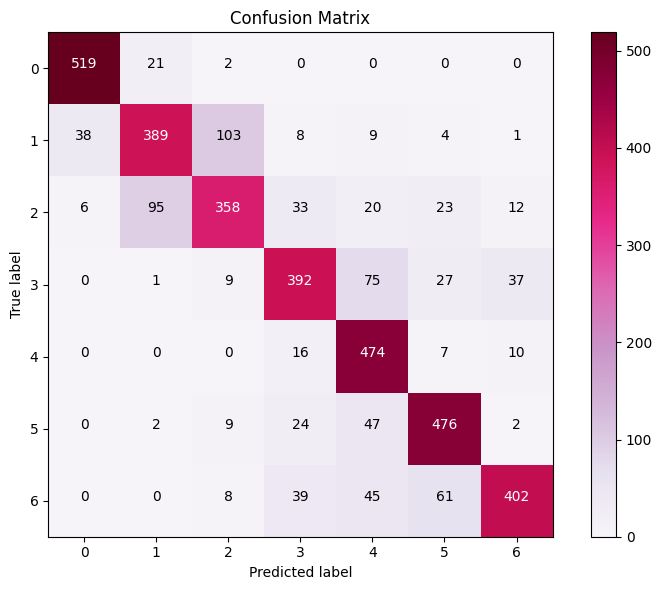

In [30]:
############# plot confusion matrix ############

from matplotlib import pyplot as plt
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, test_preds_SVC.round())
# Plot confusion matrix with custom color map

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.PuRd)  # Set cmap to custom color map
plt.title('Confusion Matrix')
plt.colorbar()

# Adding annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), #'d = integer
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout() #improves the layout of plots by preventing overlapping elements such as axis labels, tick labels, and titles
plt.show()


In [ ]:
############# validaition_curve #####################
from sklearn.model_selection import ValidationCurveDisplay
ValidationCurveDisplay.from_estimator(
   SVC(**trial.params), compressed_dataset_X, y, param_name="C", param_range=np.logspace(-7, 3, 10)
)
plt.show()